# Trabalho 2
# **Introdução a Análise Preditiva**

**prof: Sergio Assuncao Monteiro, DSc**

linkedin: https://www.linkedin.com/in/sergio-assun%C3%A7%C3%A3o-monteiro-b781897b/

lattes: http://lattes.cnpq.br/9489191035734025

**aluno: Marcelo Soares da Costa**

linkedin: https://linkedin.com/in/marcelo-soares-da-costa-843b7b168

github: https://github.com/MarceloDaCosta

matrícula: 202205147339

curso: BI & Data Science

disciplina: Projeto Aplicado - Análise Preditiva e Vantagem Comercial


**Análise de Dados Financeiros**

# **Instalação dos Pacotes**

In [89]:
# Instalando o yahoo finance
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importação dos Pacotes**

In [92]:
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import requests

# **Baixar Dados Reais**

In [93]:
url = "https://www.dadosdemercado.com.br/bolsa/acoes"
r = requests.get(url)
html = r.text
df_nomes_tickers = pd.read_html(html, header=0, index_col=5)[0]
df_nomes_tickers.head(10)

,Código,Nome,Volume,Última (R$),Variação
NaN,HAPV3,Hapvida,221.521.500,292,"+8,96%"
NaN,MGLU3,Magazine Luiza,154.796.900,343,"+6,52%"
NaN,BBDC4,Banco Bradesco,76.198.500,1402,"+3,09%"
NaN,B3SA3,B3,74.476.900,1165,"+5,43%"
NaN,PETR4,Petrobras,66.220.400,2542,"+1,27%"
NaN,VIIA3,Via,51.083.800,195,"+3,72%"
NaN,COGN3,Cogna,50.974.900,220,"+8,91%"
NaN,OIBR3,Oi,41.967.300,160,"-8,05%"
NaN,AMER3,AMER3,38.498.200,110,"+2,80%"
NaN,ITUB4,Itaú Unibanco,35.335.600,2514,"+1,25%"


In [94]:
# Códigos das ações blue chips que serão utilizadas paral análise.
blue_chips = ['PETR4.SA', 'VALE3.SA', 'ABEV3.SA', 'CMIG4.SA', 'ITUB4.SA', 'ELET3.SA', 'GOLL4.SA', 'BBDC4.SA', 'ITSA4.SA', 'AZUL4.SA']

In [95]:
def codigo_ativo(indice):
  return blue_chips[indice][:-3]

In [96]:
def codigos_blue_chips():
  codigos = []
  for i in range(len(blue_chips)):
    codigo = codigo_ativo(i)
    codigos.append(codigo)
  return codigos

In [97]:
print(codigos_blue_chips())

['PETR4', 'VALE3', 'ABEV3', 'CMIG4', 'ITUB4', 'ELET3', 'GOLL4', 'BBDC4', 'ITSA4', 'AZUL4']


In [98]:
# Lista das ações
df_nomes_tickers[df_nomes_tickers['Código'].isin(codigos_blue_chips())]

,Código,Nome,Volume,Última (R$),Variação
NaN,BBDC4,Banco Bradesco,76.198.500,1402,"+3,09%"
NaN,PETR4,Petrobras,66.220.400,2542,"+1,27%"
NaN,ITUB4,Itaú Unibanco,35.335.600,2514,"+1,25%"
NaN,GOLL4,GOL,33.852.500,721,"+7,45%"
NaN,AZUL4,Azul,32.099.400,1198,"-0,17%"
NaN,ITSA4,Itaúsa,25.673.300,830,"+2,09%"
NaN,ABEV3,Ambev,24.867.300,1362,"+1,41%"
NaN,VALE3,Vale,22.274.800,8611,"+0,91%"
NaN,CMIG4,CEMIG,12.536.200,1074,"+1,99%"
NaN,ELET3,Eletrobras,10.644.700,3307,"+2,45%"


In [99]:
with pd.option_context('display.max_rows',10):
  print(df_nomes_tickers)

    Código            Nome       Volume Última (R$) Variação
NaN  HAPV3         Hapvida  221.521.500         292   +8,96%
NaN  MGLU3  Magazine Luiza  154.796.900         343   +6,52%
NaN  BBDC4  Banco Bradesco   76.198.500        1402   +3,09%
NaN  B3SA3              B3   74.476.900        1165   +5,43%
NaN  PETR4       Petrobras   66.220.400        2542   +1,27%
..     ...             ...          ...         ...      ...
NaN  TKNO3           Tekno          100        8570  +10,64%
NaN  COCE6          Coelce          100        3500  +16,63%
NaN  MGEL3         Mangels          100        7500   +8,70%
NaN  CTSA8      Santanense        2.000         100   +0,00%
NaN  MMAQ4   Minasmáquinas           14       20006  -28,55%

[524 rows x 5 columns]


In [100]:
dados_series = yf.download(blue_chips, start="2018-01-01", end="2022-01-01")

[*********************100%***********************]  10 of 10 completed


In [101]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

            Adj Close                                                        \
             ABEV3.SA   AZUL4.SA   BBDC4.SA  CMIG4.SA   ELET3.SA   GOLL4.SA   
Date                                                                          
2018-01-02  18.143393  27.150000  15.333241  2.977266  14.943134  15.190000   
2018-01-03  18.185217  27.059999  15.403733  2.951600  14.752270  15.010000   
2018-01-04  18.084841  27.230000  15.656474  2.917379  14.656839  15.580000   
2018-01-05  18.151756  27.200001  15.745150  2.921657  14.521642  15.660000   
2018-01-08  18.118299  26.910000  15.740714  2.930212  14.617075  15.700000   
...               ...        ...        ...       ...        ...        ...   
2021-12-23  14.771684  26.459999  16.359652  8.422156  32.608788  18.430000   
2021-12-27  14.752684  25.670000  16.546713  8.473667  32.589172  18.040001   
2021-12-28  14.743185  25.750000  16.487188  8.505862  32.755898  17.860001   
2021-12-29  14.676688  23.860001  16.410666  8.39640

In [102]:
#Selecionar apenas os dados referentes ao preço de fechamento
df = dados_series.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis=1) 

In [103]:
df.head()

Close                                                      \
             ABEV3.SA   AZUL4.SA   BBDC4.SA  CMIG4.SA   ELET3.SA GOLL4.SA   
Date                                                                        
2018-01-02  21.690001  27.150000  19.693554  4.612089  18.782862    15.19   
2018-01-03  21.740000  27.059999  19.773239  4.572330  18.542953    15.01   
2018-01-04  21.620001  27.230000  20.097670  4.519317  18.422998    15.58   
2018-01-05  21.700001  27.200001  20.211506  4.525944  18.253063    15.66   
2018-01-08  21.660000  26.910000  20.205814  4.539197  18.373018    15.70   

                                                       
            ITSA4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  
Date                                                   
2018-01-02  8.681621  29.253332  16.549999  41.720001  
2018-01-03  8.783943  29.453333  16.700001  41.470001  
2018-01-04  8.949232  30.066666  16.730000  41.639999  
2018-01-05  8.964974  30.153334  16.830000  42.290001  
2018-01-08  8.957103  30.053333  17.030001  43.230000

In [104]:
# Lista utilizada como marcardor de tempo
x = np.arange (1,len(df)+1,1)

**padronização dos dados**

In [105]:
def filtrar_ativo(ativo):
  df_filtro = df['Close'][ativo]
  return df_filtro

In [106]:
def ativo_normalizado(ativo):
  y = filtrar_ativo(ativo)
  minimo = np.min(y)
  maximo = np.max(y)
  y = (y - minimo)/(maximo - minimo)
  return y

In [107]:
y = []
for a in blue_chips:
  ativo = ativo_normalizado(a)
  y.append(ativo)

**Visualização da Série**

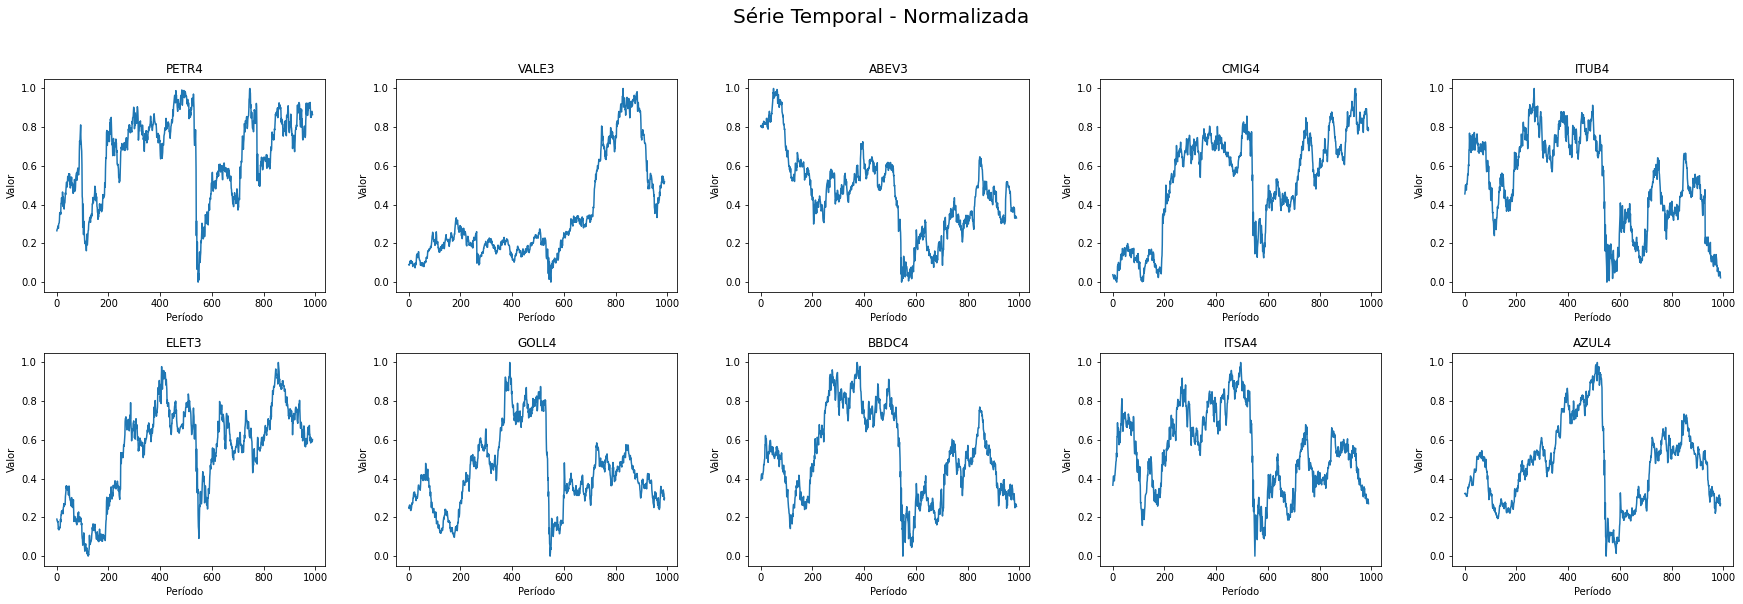

In [108]:
title="Série Temporal - Normalizada"

fig1, ax = plt.subplots(2,5,figsize=(25,9))
fig1.suptitle(title, y=0.95, fontsize=20)
fig1.tight_layout(pad=4)

cont=0;
for i in range(2):
  for j in range(5):
    ax[i][j].plot(x,y[cont])
    ax[i][j].set(xlabel='Período', ylabel='Valor')
    ax[i][j].title.set_text(codigo_ativo(cont))
    cont=cont+1

plt.show()

**Preparação dos conjuntos de dados de treinamento e de teste**

In [109]:
treinos = []
testes = []

for i in range(len(blue_chips)):
  percentual_treinamento = 0.8
  qtd_treinamento = int(percentual_treinamento*(len(x)));

  x_treino = x[0:qtd_treinamento] 
  x_teste = x[qtd_treinamento:]

  y_treino = y[i][0:qtd_treinamento]
  y_teste = y[i][qtd_treinamento:]

  treino = np.array(list(zip(x_treino, y_treino)))
  teste = np.array(list(zip(x_teste, y_teste)))
  
  treinos.append(treino)
  testes.append(teste)

  for j in range(5):
    print('treino[{} - {}]: {}'.format(codigo_ativo(i), j+1, treino[j]))
  print('\n')

treino[PETR4 - 1]: [1.         0.26525462]
treino[PETR4 - 2]: [2.         0.27281899]
treino[PETR4 - 3]: [3.         0.27433179]
treino[PETR4 - 4]: [4.         0.27937467]
treino[PETR4 - 5]: [5.         0.28946044]


treino[VALE3 - 1]: [1.         0.09004966]
treino[VALE3 - 2]: [2.         0.08709528]
treino[VALE3 - 3]: [3.         0.08910424]
treino[VALE3 - 4]: [4.         0.09678566]
treino[VALE3 - 5]: [5.         0.10789412]


treino[ABEV3 - 1]: [1.         0.80513597]
treino[ABEV3 - 2]: [2.         0.80891235]
treino[ABEV3 - 3]: [3.         0.79984898]
treino[ABEV3 - 4]: [4.         0.80589127]
treino[ABEV3 - 5]: [5.         0.80287006]


treino[CMIG4 - 1]: [1.         0.03818143]
treino[CMIG4 - 2]: [2.         0.03272698]
treino[CMIG4 - 3]: [3.         0.02545429]
treino[CMIG4 - 4]: [4.         0.02636344]
treino[CMIG4 - 5]: [5.         0.02818155]


treino[ITUB4 - 1]: [1.        0.4555729]
treino[ITUB4 - 2]: [2.         0.46600591]
treino[ITUB4 - 3]: [3.         0.49800032]
trein

**Organização do modelo de dados**

In [110]:
def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

In [111]:
def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

**Visualização da estruturação dos dados**

In [112]:
x_treinos = []
y_treinos = []
x_testes = []
y_testes = []

for i in range(len(blue_chips)):
  look_back = 2
  x_treino, y_treino = preparar_dados(treinos[i], look_back)
  x_teste, y_teste = preparar_dados(testes[i], look_back)

  n_caracteristicas = 1 #série monovariada
  x_treino = x_treino.reshape((x_treino.shape[0], 
                              x_treino.shape[1], 
                              n_caracteristicas))
  x_teste = x_teste.reshape((x_teste.shape[0], 
                        x_teste.shape[1], 
                        n_caracteristicas))

  x_treinos.append(x_treino)
  y_treinos.append(y_treino)
  x_testes.append(x_teste)
  y_testes.append(y_teste)

  #print('ax: {}'.format(trainx))
  #print('y: {}'.format(y))
  for j in range(5):
    print('treino[{} - {}]: {} -> {}'.format(codigo_ativo(i), j+1, x_treino[j], y_treino[j]))
  
  print('\n')

treino[PETR4 - 1]: [[0.26525462]
 [0.27281899]] -> 0.27433178717549045
treino[PETR4 - 2]: [[0.27281899]
 [0.27433179]] -> 0.2793746705363175
treino[PETR4 - 3]: [[0.27433179]
 [0.27937467]] -> 0.2894604372579715
treino[PETR4 - 4]: [[0.27937467]
 [0.28946044]] -> 0.2894604372579715
treino[PETR4 - 5]: [[0.28946044]
 [0.28946044]] -> 0.2778617766725694


treino[VALE3 - 1]: [[0.09004966]
 [0.08709528]] -> 0.0891042386054744
treino[VALE3 - 2]: [[0.08709528]
 [0.08910424]] -> 0.09678565558469047
treino[VALE3 - 3]: [[0.08910424]
 [0.09678566]] -> 0.10789412398694366
treino[VALE3 - 4]: [[0.09678566]
 [0.10789412]] -> 0.10600331989548938
treino[VALE3 - 5]: [[0.10789412]
 [0.10600332]] -> 0.09891281582261721


treino[ABEV3 - 1]: [[0.80513597]
 [0.80891235]] -> 0.7998489823668942
treino[ABEV3 - 2]: [[0.80891235]
 [0.79984898]] -> 0.8058912723462482
treino[ABEV3 - 3]: [[0.79984898]
 [0.80589127]] -> 0.802870055326793
treino[ABEV3 - 4]: [[0.80589127]
 [0.80287006]] -> 0.7983383738571665
treino[ABEV3

**Criação do Modelo de Redes Neurais**

In [113]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

modelos = []

for i in range(len(blue_chips)):
  n_etapas = x_treinos[i].shape[1]
  n_caracteristicas = x_treinos[i].shape[2]
  epocas = 20
  n_unidades = 100
  tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
  modelo = Sequential()
  camada_de_entrada=(n_etapas, n_caracteristicas)
  modelo.add(LSTM(n_unidades, 
                return_sequences = True, 
                input_shape = camada_de_entrada))
  modelo.add(Dropout(0.2))
  modelo.add(LSTM(128,
                input_shape = camada_de_entrada))
  modelo.add(Dense(1))

  modelos.append(modelo)


**Visualização do modelo**

In [114]:
for i in range(len(blue_chips)):
  modelos[i].summary()
  print ('\n')

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 2, 100)            40800     
                                                                 
 dropout_12 (Dropout)        (None, 2, 100)            0         
                                                                 
 lstm_26 (LSTM)              (None, 128)               117248    
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable params: 158,177
Non-trainable params: 0
_________________________________________________________________


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)       

**Escolha de Hiperparâmetros**

In [115]:
for i in range(len(blue_chips)):
  modelos[i].compile(loss = 'mean_squared_error', 
                optimizer = 'adam')

**Treinamento do Modelo**

In [116]:
historicos = []

for i in range(len(blue_chips)):
  historico = modelos[i].fit(x_treinos[i], y_treinos[i],
                        epochs = epocas,
                        batch_size = 70,
                        verbose = 2,
                        shuffle = False,
                        validation_split = 0.3)
  historicos.append(historico)

Epoch 1/20
8/8 - 9s - loss: 0.3806 - val_loss: 0.2079 - 9s/epoch - 1s/step
Epoch 2/20
8/8 - 0s - loss: 0.1845 - val_loss: 0.0555 - 327ms/epoch - 41ms/step
Epoch 3/20
8/8 - 0s - loss: 0.0189 - val_loss: 0.0275 - 295ms/epoch - 37ms/step
Epoch 4/20
8/8 - 0s - loss: 0.0360 - val_loss: 0.0260 - 296ms/epoch - 37ms/step
Epoch 5/20
8/8 - 0s - loss: 0.0190 - val_loss: 0.0086 - 353ms/epoch - 44ms/step
Epoch 6/20
8/8 - 0s - loss: 0.0160 - val_loss: 0.0079 - 311ms/epoch - 39ms/step
Epoch 7/20
8/8 - 0s - loss: 0.0083 - val_loss: 0.0109 - 346ms/epoch - 43ms/step
Epoch 8/20
8/8 - 0s - loss: 0.0102 - val_loss: 0.0096 - 374ms/epoch - 47ms/step
Epoch 9/20
8/8 - 0s - loss: 0.0097 - val_loss: 0.0065 - 355ms/epoch - 44ms/step
Epoch 10/20
8/8 - 0s - loss: 0.0076 - val_loss: 0.0062 - 392ms/epoch - 49ms/step
Epoch 11/20
8/8 - 0s - loss: 0.0067 - val_loss: 0.0060 - 386ms/epoch - 48ms/step
Epoch 12/20
8/8 - 0s - loss: 0.0063 - val_loss: 0.0048 - 432ms/epoch - 54ms/step
Epoch 13/20
8/8 - 0s - loss: 0.0060 - val_

**Visualização do "aprendizado"**

In [117]:
import pandas as pd
hist = pd.DataFrame(historicos[0].history)
hist.head()

,loss,val_loss
0,0.380604,0.207947
1,0.184544,0.055543
2,0.018886,0.027518
3,0.036006,0.025987
4,0.018965,0.008628


**Precisão do Modelo**

In [118]:
for i in range(len(blue_chips)):
  loss = modelos[i].evaluate(x_testes[i], y_testes[i], batch_size=64)
  print("loss: {}".format(loss))

4/4 [==============================] - 0s 6ms/step - loss: 0.0012
loss: 0.0011996985413134098
4/4 [==============================] - 0s 5ms/step - loss: 9.2641e-04
loss: 0.0009264087420888245
4/4 [==============================] - 0s 7ms/step - loss: 0.0011
loss: 0.0011226823553442955
4/4 [==============================] - 0s 6ms/step - loss: 0.0012
loss: 0.0011864090338349342
4/4 [==============================] - 0s 8ms/step - loss: 0.0094
loss: 0.009445082396268845
4/4 [==============================] - 0s 6ms/step - loss: 0.0010
loss: 0.0010141113307327032
4/4 [==============================] - 0s 7ms/step - loss: 4.6766e-04
loss: 0.00046766328159719706
4/4 [==============================] - 0s 9ms/step - loss: 9.4864e-04
loss: 0.000948642729781568
4/4 [==============================] - 0s 6ms/step - loss: 0.0014
loss: 0.0013893692521378398
4/4 [==============================] - 0s 7ms/step - loss: 7.1668e-04
loss: 0.0007166789728216827


**Visualização do Processo de Aprendizado**

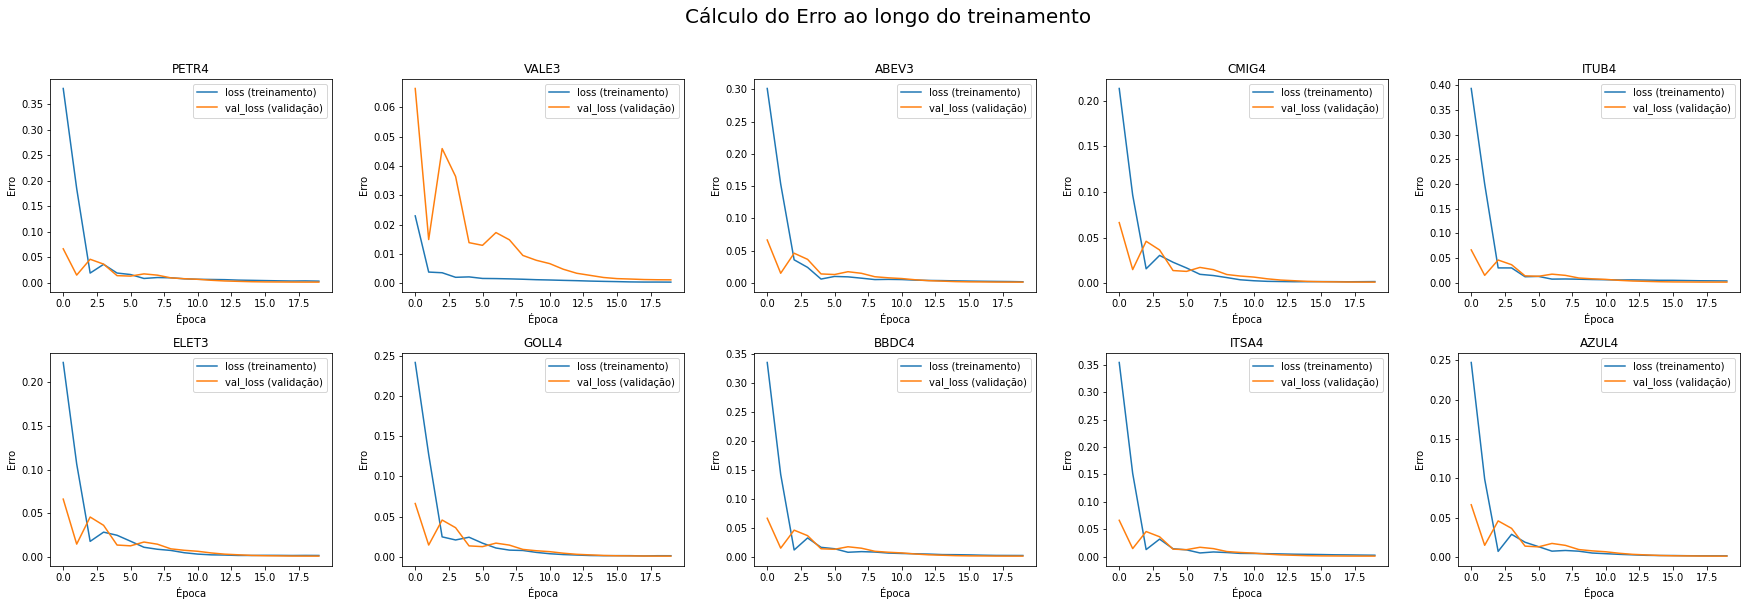

In [119]:
title="Cálculo do Erro ao longo do treinamento"

fig1, ax = plt.subplots(2,5,figsize=(25,9))
fig1.suptitle(title, y=0.95, fontsize=20)
fig1.tight_layout(pad=4)

cont=0;
for i in range(2):
  for j in range(5):
    ax[i][j].plot(historicos[cont].history['loss'])
    ax[i][j].plot(historico.history['val_loss'])
    ax[i][j].legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
    ax[i][j].set(xlabel='Época', ylabel='Erro')
    ax[i][j].title.set_text(codigo_ativo(cont))
    cont=cont+1

plt.show()

**Realização da Predição**

In [120]:
predicoes = []

for i in range(len(blue_chips)):
  predicao = modelo.predict(x_testes[i])
  predicoes.append(predicao)

7/7 [==============================] - 0s 7ms/step


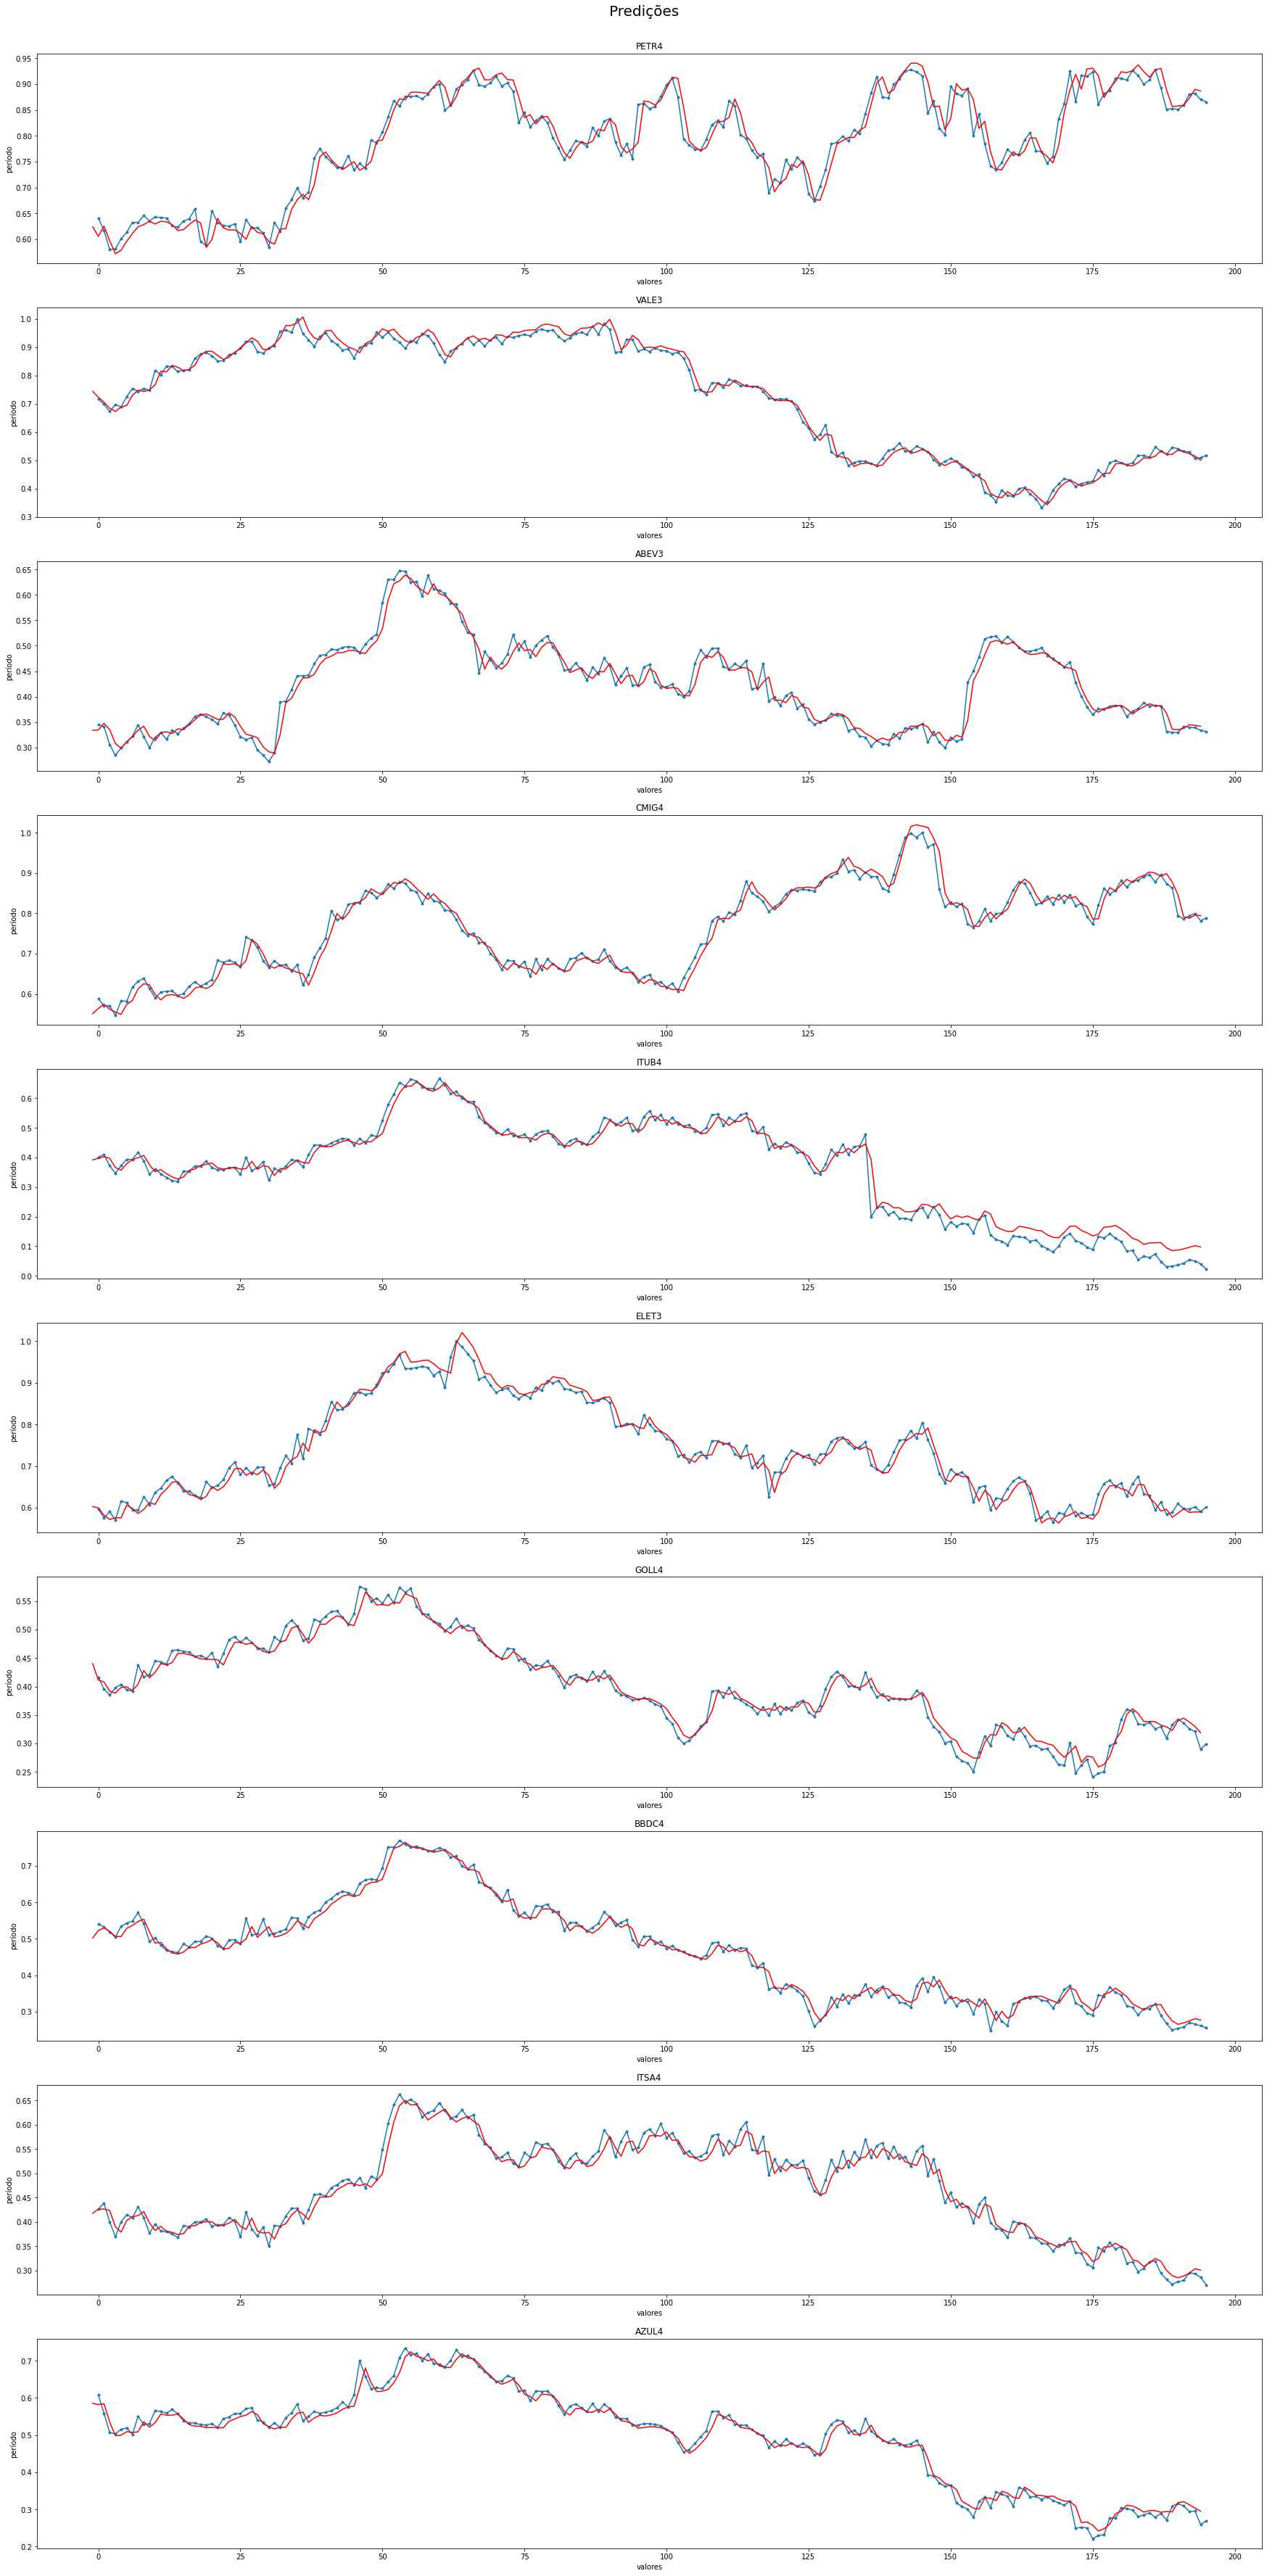

In [121]:
lst_dados_predicoes = []

title="Predições"

fig1, ax = plt.subplots(10,figsize=(25,50))
fig1.suptitle(title, y=0.99, fontsize=20)
fig1.tight_layout(pad=4)

for i in range(len(blue_chips)):
  look_back = 1
  valores_reais_y = y_testes[i]
  ax[i].plot(list(range(len(valores_reais_y))), 
          valores_reais_y, 
          marker='.', 
          label="Real")
  lst_dados_predicao=[w[0] for w in predicoes[i]]
  ax[i].plot(list(np.arange(len(predicoes[i]))-look_back), 
          lst_dados_predicao, 
          'r',label="Estimação do Modelo")
  ax[i].set(xlabel='valores', ylabel='período')
  ax[i].title.set_text(codigo_ativo(i))
  lst_dados_predicoes.append(lst_dados_predicao)

plt.show()

# **Fazendo Predições**

In [122]:
len(valores_reais_y)

196

In [123]:
len(lst_dados_predicao)

196

In [124]:
n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0

array([[0.29581252],
       [0.25950827]])

In [125]:
minhas_predicoes = []

for i in range(len(blue_chips)):
  minha_predicao = modelos[i].predict([x_testes[i][n-1]])
  minhas_predicoes.append(minha_predicao)

1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 901ms/step


1/1 [==============================] - 1s 875ms/step


1/1 [==============================] - 1s 794ms/step


1/1 [==============================] - 1s 801ms/step


1/1 [==============================] - 1s 845ms/step


1/1 [==============================] - 1s 790ms/step


1/1 [==============================] - 1s 812ms/step


1/1 [==============================] - 1s 805ms/step


1/1 [==============================] - 1s 809ms/step


In [126]:
for i in range(len(blue_chips)):
  print(f'minha predição para {codigo_ativo(i)} é: {minhas_predicoes[i]}')

minha predição para PETR4 é: [[0.26693782]
 [0.26401806]]
minha predição para VALE3 é: [[0.17291595]
 [0.1735874 ]]
minha predição para ABEV3 é: [[0.1387297 ]
 [0.13758984]]
minha predição para CMIG4 é: [[0.24667719]
 [0.24167085]]
minha predição para ITUB4 é: [[0.10457496]
 [0.10275061]]
minha predição para ELET3 é: [[0.18688495]
 [0.18396878]]
minha predição para GOLL4 é: [[0.12187745]
 [0.11438309]]
minha predição para BBDC4 é: [[0.11899664]
 [0.11781801]]
minha predição para ITSA4 é: [[0.1372984 ]
 [0.13556485]]
minha predição para AZUL4 é: [[0.12046083]
 [0.11168053]]


# **Aplicação na mochila**

# **Instalação do pacote mip**

documentação do pacote MIP: https://python-mip.readthedocs.io/en/latest/classes.html

In [127]:
!pip install mip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Problema da Mochila**

In [128]:
valores_predicao = []
for i in range(len(blue_chips)):
  valores_predicao.append(minhas_predicoes[i][0][0])
valores_predicao

[0.26693782,
 0.17291595,
 0.1387297,
 0.24667719,
 0.104574956,
 0.18688495,
 0.12187745,
 0.11899664,
 0.1372984,
 0.12046083]

# **Utilizando o Latex dinamicamente**

In [129]:
from IPython.display import display, Math, Latex, Markdown

In [130]:
display(Markdown(r'**Formulação do Modelo do problema da mochila (knapsack problem)**'))

texto_funcao_objetivo = '\max '
for i in range(len(blue_chips)):
  texto_funcao_objetivo = texto_funcao_objetivo + f' {str(valores_predicao[i])[:10]}\ x_' + '{' + str(i+1) + '}'
  if i < len(blue_chips) - 1:
    texto_funcao_objetivo = texto_funcao_objetivo + ' + '
display(Latex(texto_funcao_objetivo))

texto_coeficiente_restricao = 'sujeito \ a: '
for i in range(len(blue_chips)):
  texto_coeficiente_restricao = texto_coeficiente_restricao + ' \ x_' + '{' + str(i+1) + '}'
  if i < len(blue_chips) - 1:
    texto_coeficiente_restricao = texto_coeficiente_restricao + ' + '
texto_coeficiente_restricao = texto_coeficiente_restricao + ' = 3 '
display(Latex(texto_coeficiente_restricao))

formula = 'x_{i}\in\{0,1\},\\forall i \in {'
for i in range(len(blue_chips)):
  formula = formula + str(i+1)
  if i < len(blue_chips) - 1:
    formula = formula + ','
formula = formula + '}' 
display(Latex(formula))

**Formulação do Modelo do problema da mochila (knapsack problem)**

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [131]:
from mip import Model, maximize, xsum, CBC, BINARY, OptimizationStatus

In [132]:
coef_funcao_objetivo = valores_predicao
coef_restr = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
termo_independente = 3 

In [133]:
I = range(len(coef_funcao_objetivo))
m = Model("knapsack")

In [134]:
x = [m.add_var(var_type=BINARY) for i in I]

In [135]:
m.objective = maximize(xsum(coef_funcao_objetivo[i] * x[i] for i in I))

In [136]:
funcao_objetivo=xsum(coef_funcao_objetivo[i] * x[i] for i in I)

In [137]:
m += xsum(coef_restr[i] * x[i] for i in I) <= termo_independente
print(f'O modelo tem {m.num_cols} variável(eis), {m.num_rows} restrição(ões) e {m.num_nz} zero(s)')

O modelo tem 10 variável(eis), 1 restrição(ões) e 10 zero(s)


In [138]:
status = m.optimize(max_seconds=2)

In [139]:
status == OptimizationStatus.OPTIMAL

True

In [140]:
itens_selecionados = ["x"+str(i+1) for i in I if x[i].x >= 0.99]
print("Itens selecionados: {}".format(itens_selecionados))

Itens selecionados: ['x1', 'x4', 'x6']


In [141]:
print(f'Valor da solução ótima = {m.objective_value}')

Valor da solução ótima = 0.7004999667406082


# **Validando resultado**

In [142]:
valores_ordenados = []
for i in range(len(blue_chips)):
  valores_ordenados.append(['x' + str(i+1), codigo_ativo(i), valores_predicao[i]])
valores_ordenados.sort(key=lambda x:x[2],reverse=True)
valores_ordenados

[['x1', 'PETR4', 0.26693782],
 ['x4', 'CMIG4', 0.24667719],
 ['x6', 'ELET3', 0.18688495],
 ['x2', 'VALE3', 0.17291595],
 ['x3', 'ABEV3', 0.1387297],
 ['x9', 'ITSA4', 0.1372984],
 ['x7', 'GOLL4', 0.12187745],
 ['x10', 'AZUL4', 0.12046083],
 ['x8', 'BBDC4', 0.11899664],
 ['x5', 'ITUB4', 0.104574956]]

# **Análise Resumida**

**Racional**:

Foram escolhidas as empresas de grande porte com alto volume negociado na bolsa, as chamadas blue chips.

A proposta foi de diversificar, portanto as empresas selecinoadas pertencem a diferentes setores da economia.

**Resultado**:

Os itens selecionados na mochila foram o x1(PETR4), x4(CMIG4) e x6(ELET3).

Pôde-se observar que o resultado fez total sentido, uma vez que foram estas as maiores predições, conforme verificado na ordenação.